In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error


houses = pd.read_csv('houses .csv') 

#  Data Cleaning

In [2]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
drop_column= houses.isnull().sum()
drop_column[drop_column>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [6]:
houses =houses.dropna(thresh=len(houses) - 10, axis=1)

In [7]:
houses = houses.dropna()

In [8]:
houses.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Data processing 

## categorical convert

In [9]:
convert_rule = {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'No':1}
houses.ExterQual   = houses.ExterQual.map(convert_rule)
houses.ExterCond   = houses.ExterCond.map(convert_rule)
houses.HeatingQC   = houses.HeatingQC.map(convert_rule)
houses.KitchenQual = houses.KitchenQual.map(convert_rule)

In [10]:
lotshape_rule = {'Reg':4,'IR1':3,'IR2':2,'IR3':1}
houses.LotShape = houses.LotShape.map(lotshape_rule)

In [11]:
utilities_rule = {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
houses.Utilities = houses.Utilities.map(utilities_rule)

In [12]:
landslope_rule = {'Gtl':3,'Mod':2,'Sev':1}
houses.LandSlope = houses.LandSlope.map(landslope_rule)

In [13]:
houses.describe()

,Id,MSSubClass,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,10507.808408,3.590627,3.998622,2.937285,6.093728,5.579600,1971.092350,1984.760165,...,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,9992.987081,0.582996,0.052504,0.277045,1.381467,1.113415,30.190266,20.651334,...,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,1300.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,7537.500000,3.000000,4.000000,3.000000,5.000000,5.000000,1954.000000,1966.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,9477.000000,4.000000,4.000000,3.000000,6.000000,5.000000,1972.000000,1993.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,11600.000000,4.000000,4.000000,3.000000,7.000000,6.000000,2000.000000,2004.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,4.000000,4.000000,3.000000,10.000000,9.000000,2010.000000,2010.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## split train and test sets

In [14]:
train = houses.sample(frac=0.7, random_state=1)
test = houses[houses.index.isin(train.index)==False]

# EDA

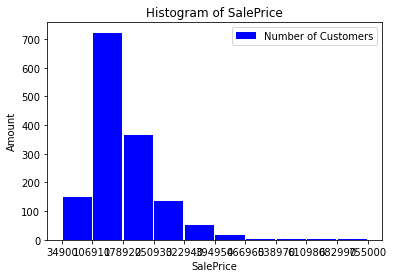

In [15]:
my_figure3 = plt.figure()

n, bins, patches = plt.hist(houses['SalePrice'], rwidth = 0.95, bins=10, align = "mid", label = "Number of Customers", color = [0, 0, 1, 1])

plt.xticks(bins)
plt.xlabel("SalePrice")
plt.ylabel("Amount")
plt.title("Histogram of SalePrice")
plt.legend()

Text(0.5, 1.0, 'Boxplot of SalePrice')

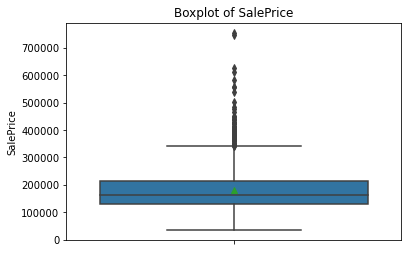

In [16]:
ax=sns.boxplot(y=houses['SalePrice'],showmeans=True)
plt.title("Boxplot of SalePrice")

In [17]:
houses['SalePrice'].describe().round(4)

count      1451.0000
mean     180624.1020
std       79312.1283
min       34900.0000
25%      129900.0000
50%      162500.0000
75%      214000.0000
max      755000.0000
Name: SalePrice, dtype: float64

In [18]:
stats.describe(houses['SalePrice'])

DescribeResult(nobs=1451, minmax=(34900, 755000), mean=180624.10199862163, variance=6290413691.14959, skewness=1.8811637836028376, kurtosis=6.546264635355081)

In [19]:
corr= train.corr()
corr_sp= corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_sp

OverallQual      0.796326
GrLivArea        0.747181
ExterQual        0.685097
KitchenQual      0.681633
TotalBsmtSF      0.657891
1stFlrSF         0.646456
GarageCars       0.639051
GarageArea       0.623788
TotRmsAbvGrd     0.553103
FullBath         0.550809
YearBuilt        0.507301
YearRemodAdd     0.505703
MasVnrArea       0.488142
Fireplaces       0.474079
HeatingQC        0.435225
BsmtFinSF1       0.399817
WoodDeckSF       0.325162
2ndFlrSF         0.322262
LotArea          0.319852
OpenPorchSF      0.307677
HalfBath         0.282059
BsmtUnfSF        0.230501
BsmtFullBath     0.206167
BedroomAbvGr     0.178890
PoolArea         0.137212
ScreenPorch      0.125472
3SsnPorch        0.050958
MoSold           0.036591
ExterCond        0.024480
Utilities        0.016548
BsmtFinSF2      -0.002494
MiscVal         -0.018882
BsmtHalfBath    -0.020694
LowQualFinSF    -0.028897
LandSlope       -0.032635
YrSold          -0.044160
Id              -0.051067
OverallCond     -0.053787
MSSubClass  

/Users/yingying/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

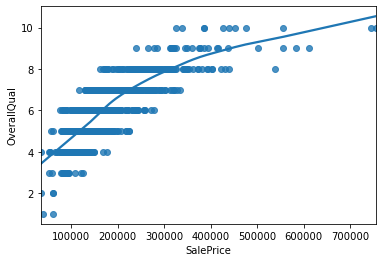

In [20]:
sns.regplot(train['SalePrice'],train['OverallQual'],lowess=True)

In [21]:
sel_train=train[['SalePrice','OverallQual','GrLivArea', 'ExterQual', 'KitchenQual','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea']]
sel_test=test[['SalePrice','OverallQual','GrLivArea', 'ExterQual', 'KitchenQual','TotalBsmtSF','1stFlrSF','GarageCars','GarageArea']]

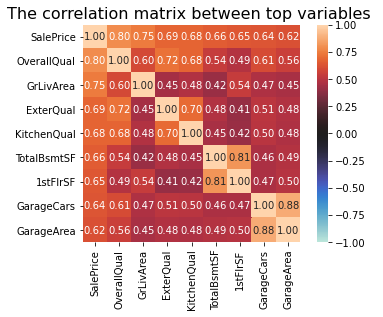

In [22]:
corr_matrix = train.corr()
cols = corr_matrix.nlargest(9, 'SalePrice')['SalePrice'].index
cmap = np.corrcoef(sel_train[cols].values.T)
sns.heatmap(cmap, cbar=True, annot=True, vmax=1,vmin=-1,center=0,square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('The correlation matrix between top variables ', fontsize= 16)
plt.show()

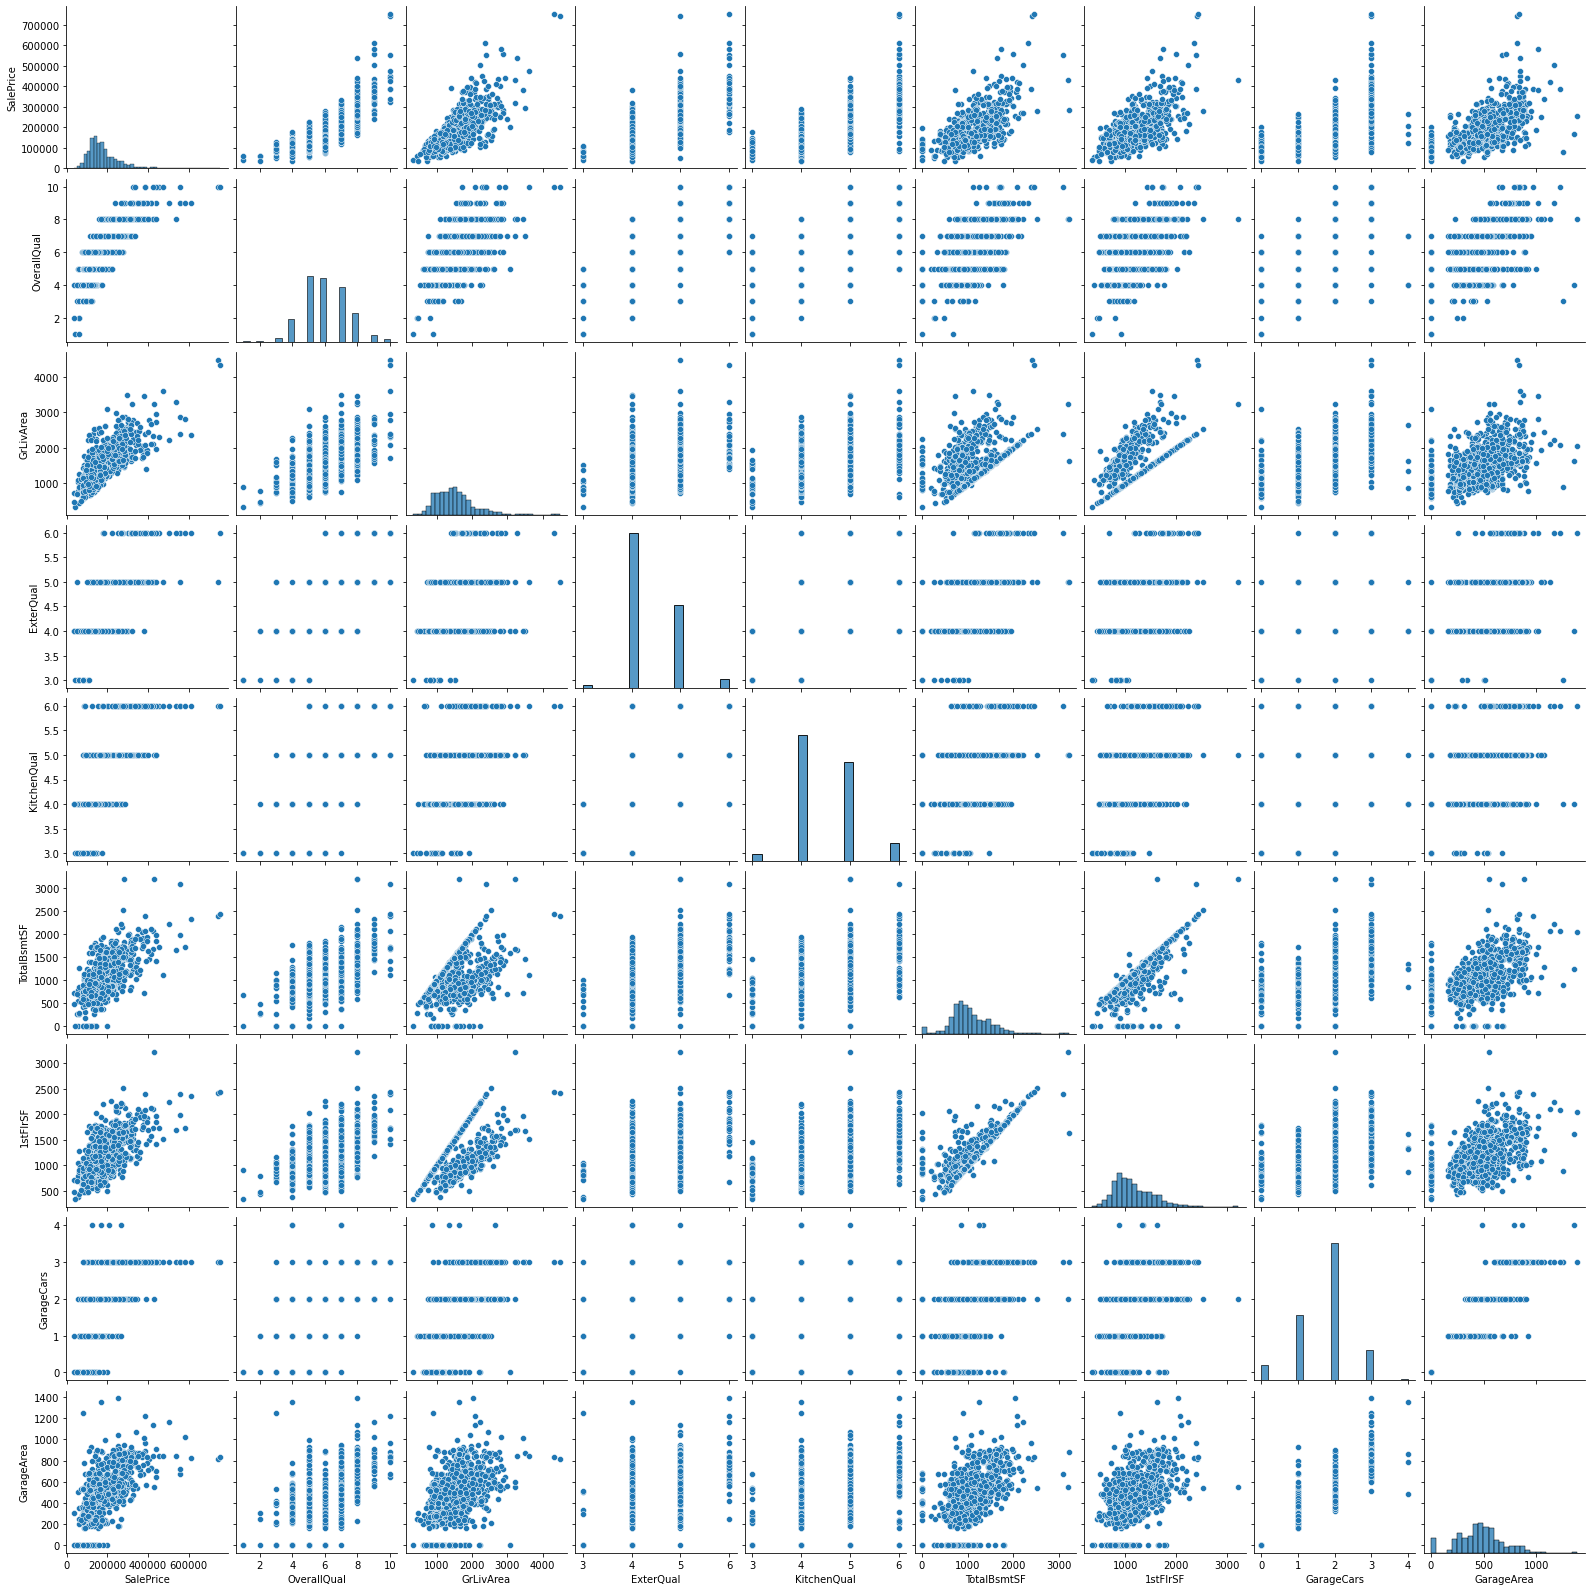

In [23]:
sns.pairplot(sel_train)
plt.show()

In [24]:
#all_data = pd.get_dummies(all_data)
#all_data.head()

# Methodology and modelling

## linear regression model

(array([  3.,  11.,  39., 132., 321., 277., 156.,  59.,  13.,   5.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <BarContainer object of 10 artists>)

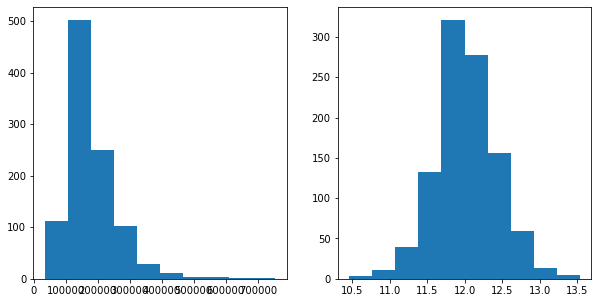

In [25]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
axis1.hist(sel_train['SalePrice'])

sel_train_price = np.log1p(sel_train['SalePrice'])
axis2.hist(sel_train_price)

In [26]:
import statsmodels.api as sm
x = sel_train.iloc[:, 1:]
y = sel_train['SalePrice']

In [27]:
predictors= list(x.columns)
response = ['SalePrice']
predictors

['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageCars',
 'GarageArea']

In [28]:
mu=train[predictors].mean() # mean for each feature
sigma=train[predictors].std() # std for each feature

In [29]:
train[predictors]=(train[predictors]-mu)/sigma
test[predictors]=(test[predictors]-mu)/sigma
x=train[predictors]

/Users/yingying/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
x_with_intercept = sm.add_constant(x, prepend=True)

In [31]:
ols = sm.OLS(np.log1p(y),x_with_intercept)
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     741.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:21:15   Log-Likelihood:                 461.02
No. Observations:                1016   AIC:                            -904.0
Df Residuals:                    1007   BIC:                            -859.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0165      0.005   2480.822      

In [32]:
x_with_intercept= x_with_intercept.drop(x_with_intercept.columns[[3, 6, 8]], axis=1)
predictors_new=['OverallQual','GrLivArea', 'KitchenQual','TotalBsmtSF','GarageCars']

In [33]:
ols = sm.OLS(np.log1p(y),x_with_intercept)
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1173.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:21:15   Log-Likelihood:                 455.17
No. Observations:                1016   AIC:                            -898.3
Df Residuals:                    1010   BIC:                            -868.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.0165      0.005   2470.231      

In [34]:
np.mean(np.abs(est.predict( sm.add_constant(test[predictors_new], prepend=True)).to_numpy() - test[response].to_numpy().T))

182310.27578663846

## kNN regression model

/Users/yingying/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


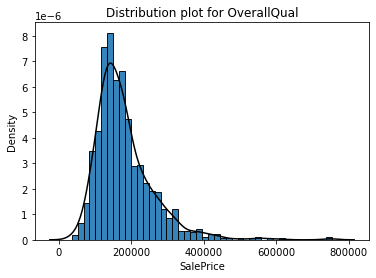

In [35]:
from sklearn import neighbors
fig, ax= plt.subplots()
sns.distplot(train['SalePrice'], ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black'},
             kde_kws={'color': 'black', 'alpha': 0.7})
ax.set_title('Distribution plot for OverallQual')
plt.show()

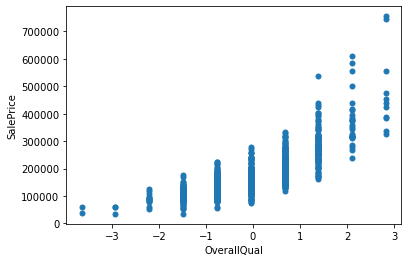

In [36]:
fig, ax= plt.subplots()
plt.scatter(train['OverallQual'], train['SalePrice'], s=25) # the s option is the size of the dot
ax.set_xlabel('OverallQual')
ax.set_ylabel('SalePrice')
plt.show()

In [37]:
knn1 = KNeighborsRegressor(n_neighbors=10) #
knn1.fit(train[['OverallQual']], train['SalePrice']) # the double bracket is a technicality: we need a list of predictors

KNeighborsRegressor(n_neighbors=10)

/Users/yingying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


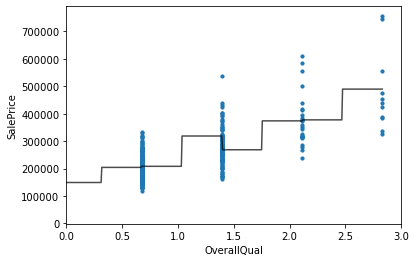

In [38]:
x = np.linspace(train['OverallQual'].min(),train['OverallQual'].max(), 1000).reshape((-1,1))

predictions = knn1.predict(x)

fig, ax = plt.subplots()
ax.scatter(train['OverallQual'], train['SalePrice'], s=10) # the s option is the size of the dot
ax.set_xlabel('OverallQual')
ax.set_ylabel('SalePrice')
ax.set_xlim(0, 3)
ax.plot(x, predictions, color='black', alpha = 0.7)
plt.show()

In [39]:
predictors=['OverallQual','GrLivArea'] # making a list to avoid retyping
knn2= KNeighborsRegressor(n_neighbors = 10 ,  metric='mahalanobis', metric_params={'V': train[predictors].cov()})
knn2.fit(train[predictors], train['SalePrice']) 

KNeighborsRegressor(metric='mahalanobis',
                    metric_params={'V':              OverallQual  GrLivArea
OverallQual     1.000000   0.599511
GrLivArea       0.599511   1.000000},
                    n_neighbors=10)

In [40]:
predictions1 = knn1.predict(test[['OverallQual']])
mae1 = mean_absolute_error(test['SalePrice'], predictions1)
rmae1 = np.sqrt(mae1)
print(rmae1)

187.31895105751408


In [41]:
predictions2 = knn2.predict(test[predictors])
mae2 = mean_absolute_error(test['SalePrice'], predictions2)
rmae2 = np.sqrt(mae2)
print(rmae2)

165.93572014003135


In [42]:
predictors=['OverallQual',
            'GrLivArea', 
            'ExterQual', 
            #'KitchenQual',
            #'TotalBsmtSF',
            #'1stFlrSF',
            #'GarageCars',
            #'GarageArea'
           ]

In [43]:
knn3= KNeighborsRegressor(n_neighbors = 10 ,  metric='mahalanobis', metric_params={'V': train[predictors].cov()})
knn3.fit(train[predictors], train['SalePrice']) 
predictions3 = knn3.predict(test[predictors])
mae3 = mean_absolute_error(test['SalePrice'], predictions3)
rmae3 = np.sqrt(mae3)
print(rmae3)

160.39786666967834


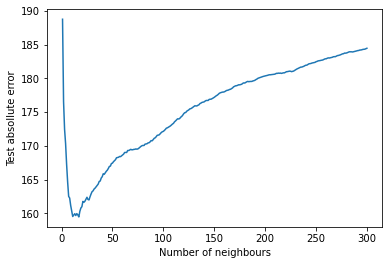

In [44]:
values = np.arange(1, 301)
test_rmae = []
for k in values : 
    knn = KNeighborsRegressor(n_neighbors= k,  metric='mahalanobis', metric_params={'V': train[predictors].cov()}) 
    knn.fit(train[predictors], train['SalePrice'])
    predictions = knn.predict(test[predictors])
    rmae = np.sqrt(mean_absolute_error(test['SalePrice'], predictions))
    test_rmae.append(rmae)
    
fig, ax= plt.subplots()
ax.plot(values, test_rmae)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test absollute error')
plt.show()

In [45]:
print('Lowest test error: K = {}'.format(1 + np.argmin(test_rmae)))

Lowest test error: K = 17


In [46]:
from sklearn.model_selection import KFold
kf=KFold(10) 

In [47]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()

In [48]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors= 5) 
scores = cross_val_score(knn, train[predictors], train['SalePrice'], cv=kf, scoring = 'neg_mean_absolute_error')

print(scores)

[-23436.42352941 -30556.24705882 -25255.61568627 -23291.15686275
 -25486.58039216 -26234.20392157 -24125.76435644 -29808.72475248
 -25200.10891089 -30159.25544554]


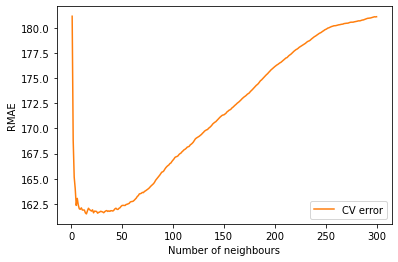

Lowest CV error: K = 15


In [49]:
neighbours=np.arange(1, 301)

cv_rmae = []
for k in neighbours: 
    knn = KNeighborsRegressor(n_neighbors= k) 
    scores = cross_val_score(knn, train[predictors], train['SalePrice'], cv=10, scoring = 'neg_mean_absolute_error')
    
    rmae = np.sqrt(-1*np.mean(scores)) 
    cv_rmae.append(rmae)
    knn.fit(train[predictors], train['SalePrice'])
    
fig, ax= plt.subplots()
ax.plot(neighbours, cv_rmae, color='#FF7F0E', label='CV error')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('RMAE')
plt.legend()
plt.show()
  
print('Lowest CV error: K = {}'.format(1 + np.argmin(cv_rmae)))  

In [50]:
knn7= KNeighborsRegressor(n_neighbors = 7 ,  metric='mahalanobis', metric_params={'V': train[predictors].cov()})
knn7.fit(train[predictors], train['SalePrice']) 
predictions7 = knn7.predict(test[predictors])
mae7 = mean_absolute_error(test['SalePrice'], predictions7)
rmae7 = np.sqrt(mae7)
print(rmae7)

162.5356719719785


## RandomForest

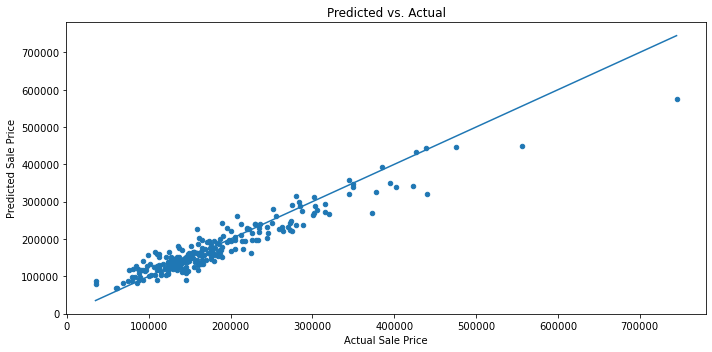

In [51]:
X_train = sel_train[sel_train.columns.values[1:-1]]
y_train = sel_train[sel_train.columns.values[0]]

X_test = test[test.columns.values[1:-1]]

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)
model_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

model_rf.fit(X_train1, y_train1)
rf_pred = model_rf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, rf_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [52]:
np.mean( np.abs(model_rf.predict(X_test1) -  y_test1.to_numpy().T) )

20702.84063730386

# additional 

In [53]:
ols = sm.OLS(y,train['OverallQual'])
est = ols.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              119.9
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                    1.91e-26
Time:                        23:21:43   Log-Likelihood:                         -13771.
No. Observations:                1016   AIC:                                  2.754e+04
Df Residuals:                    1015   BIC:                                  2.755e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [54]:
knn1.predict(np.array(5).reshape(1, -1))

/Users/yingying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([489548.])

In [57]:
knn1.predict(np.array(2).reshape(1, -1))

/Users/yingying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([373861.1])

In [56]:
knn1.predict(np.array(1).reshape(1, -1))

/Users/yingying/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([208285.])